In [243]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
#---------------------------
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
#---------------------------
import keras
from keras import metrics
from keras import optimizers
import keras_metrics
#---------------------------
import pandas_profiling
#---------------------------
from keras.models import Sequential
from keras.layers import Dense, Activation
#---------------------------
from sklearn.model_selection import train_test_split
#---------------------------
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
#--------------------------
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
#--------------------------
import time
import seaborn as sns

In [244]:
def preprocess_labels(labels, encoder=None, categorical=True):
    """Encode labels with values among 0 and `n-classes-1`"""
    if not encoder:
        encoder = LabelEncoder()
        encoder.fit(labels)
    y = encoder.transform(labels).astype(np.int32)
    if categorical:
        y = np_utils.to_categorical(y)
    return y, encoder

In [245]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [35]:
df.profile_report()

In [36]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,167196.518519,1.603185,1.852444,1.551074,35.466667,-0.017704,-0.131259,-0.164963,-0.218704,-0.265148,...,43268.021926,40306.842667,38901.908259,5689.029370,5.931783e+03,5224.739037,4852.083778,4795.497259,5221.980185,0.221222
std,129337.261882,0.489246,0.789157,0.522311,9.206436,1.125608,1.197965,1.198714,1.171908,1.136924,...,64392.383099,60803.533634,59510.024370,16911.464096,2.352149e+04,17786.906985,15978.287986,15043.584614,18069.890373,0.415078
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2313.000000,1746.000000,1261.000000,1000.000000,8.345000e+02,390.000000,291.750000,248.750000,106.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19067.500000,18118.500000,17137.500000,2100.000000,2.008500e+03,1800.000000,1500.000000,1504.500000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54656.750000,50245.500000,49326.250000,5005.000000,5.000000e+03,4500.000000,4006.000000,4036.250000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [37]:
#sns.catplot(x="EDUCATION", y="EDUCATION", hue="default.payment.next.month", kind="swarm", data=df);

In [246]:
df.SEX = df.SEX - 1
df_test.SEX = df_test.SEX - 1

In [247]:
#TRAIN
df['married'] = np.where(df['MARRIAGE']==1, 1, 0)
#df['single'] = np.where(df['MARRIAGE']==2, 1, 0)
df.drop(['MARRIAGE'], axis=1, inplace=True)

#TEST
df_test['married'] = np.where(df_test['MARRIAGE']==1, 1, 0)
#df['single'] = np.where(df['MARRIAGE']==2, 1, 0)
df_test.drop(['MARRIAGE'], axis=1, inplace=True)

In [248]:
#TRAIN
df['graduate_school'] = np.where(df['EDUCATION']==1, 1, 0)
df['university'] = np.where(df['EDUCATION']==2, 1, 0)
df['high_school'] = np.where(df['EDUCATION']==3, 1, 0)
df.drop(['EDUCATION'], axis=1, inplace=True)

#TEST
df_test['graduate_school'] = np.where(df_test['EDUCATION']==1, 1, 0)
df_test['university'] = np.where(df_test['EDUCATION']==2, 1, 0)
df_test['high_school'] = np.where(df_test['EDUCATION']==3, 1, 0)
df_test.drop(['EDUCATION'], axis=1, inplace=True)

In [249]:
#TRAIN
df['age_21_28'] = np.where(df['AGE']<29, 1, 0)
df['age_29_34'] = np.where((df['AGE']>28) & (df['AGE']<35), 1, 0)
df['age_35_41'] = np.where((df['AGE']>34) & (df['AGE']<42), 1, 0)
df.drop(['AGE'], axis=1, inplace=True)

#TEST
df_test['age_21_28'] = np.where(df_test['AGE']<29, 1, 0)
df_test['age_29_34'] = np.where((df_test['AGE']>28) & (df_test['AGE']<35), 1, 0)
df_test['age_35_41'] = np.where((df_test['AGE']>34) & (df_test['AGE']<42), 1, 0)
df_test.drop(['AGE'], axis=1, inplace=True)

In [42]:
df.describe()

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,married,graduate_school,university,high_school,age_21_28,age_29_34,age_35_41
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,167196.518519,0.603185,-0.017704,-0.131259,-0.164963,-0.218704,-0.265148,-0.289963,51323.763407,49209.214889,...,4795.497259,5221.980185,0.221222,0.456296,0.353037,0.467519,0.164000,0.267778,0.256815,0.228074
std,129337.261882,0.489246,1.125608,1.197965,1.198714,1.171908,1.136924,1.153581,73528.597002,71167.111334,...,15043.584614,18069.890373,0.415078,0.498096,0.477923,0.498953,0.370282,0.442809,0.436884,0.419598
min,10000.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3600.000000,2986.000000,...,248.750000,106.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22431.000000,21188.500000,...,1504.500000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67591.750000,64145.250000,...,4036.250000,4000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
perc_class1 = (df['default.payment.next.month'].value_counts()[1])/(df['default.payment.next.month'].value_counts()[1]+
df['default.payment.next.month'].value_counts()[0])

print("Classe 1: ", perc_class1*100 , "% \n", "Classe 0: ", (1-perc_class1)*100 , "% \n")

Classe 1:  22.12222222222222 % 
 Classe 0:  77.87777777777778 % 



In [167]:
df['default.payment.next.month'].value_counts()[1]

5973

In [168]:
df['default.payment.next.month'].value_counts()[0]

21027

In [250]:
df_ = df

In [170]:
correlation_target = df_[df_.columns[1:]].corr()['default.payment.next.month'][:]
correlation_target.sort_values(ascending=False)

default.payment.next.month    1.000000
PAY_0                         0.325007
PAY_2                         0.260109
PAY_3                         0.233915
PAY_4                         0.215813
PAY_5                         0.203571
PAY_6                         0.187654
university                    0.037111
married                       0.031448
high_school                   0.028057
age_21_28                     0.020063
BILL_AMT6                    -0.004574
age_35_41                    -0.006015
BILL_AMT5                    -0.006061
BILL_AMT4                    -0.010032
BILL_AMT3                    -0.013558
BILL_AMT2                    -0.013881
BILL_AMT1                    -0.019357
age_29_34                    -0.038389
SEX                          -0.041188
graduate_school              -0.049233
PAY_AMT6                     -0.051304
PAY_AMT3                     -0.054025
PAY_AMT4                     -0.055664
PAY_AMT5                     -0.055971
PAY_AMT2                 

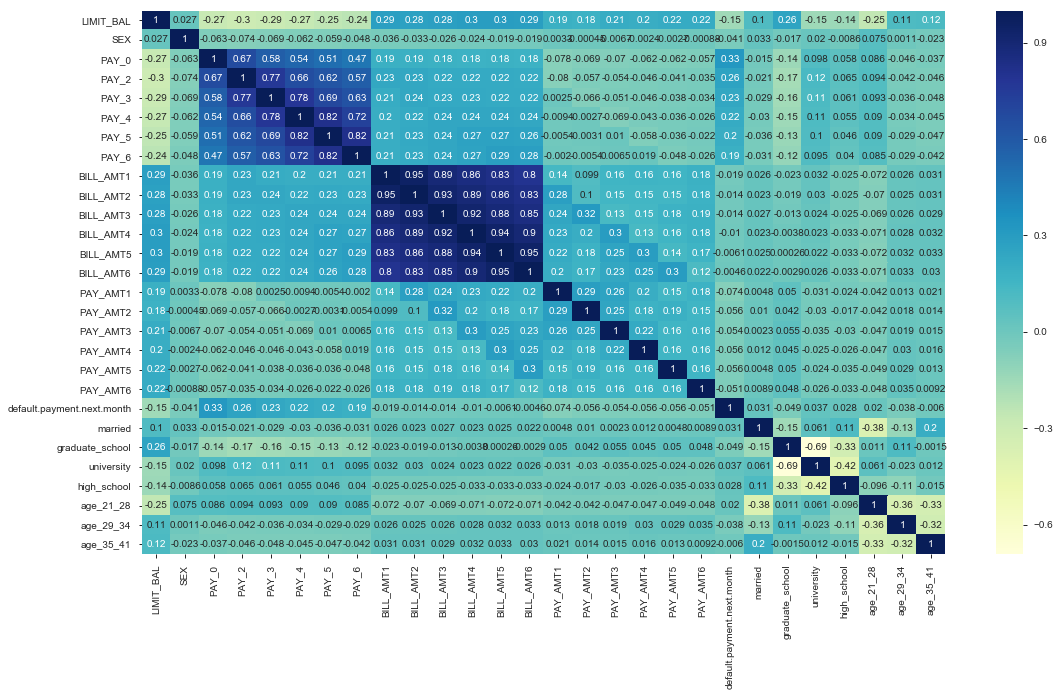

In [171]:
corrmat = df_.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [251]:
df_.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], axis=1, inplace=True)

#TEST
df_test.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], axis=1, inplace=True)

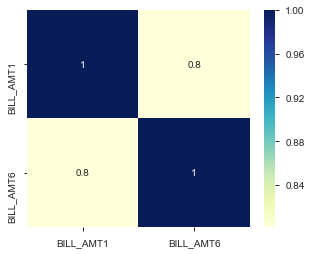

In [174]:
corrmat = df_[['BILL_AMT1', 'BILL_AMT6']].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,4))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [253]:
Y = df_['default.payment.next.month']
X = df_.drop(['default.payment.next.month'], axis=1)

In [254]:
X.shape

(27000, 23)

In [255]:
#TRAIN
stand_features = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 
                  'PAY_AMT6', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

x = X[stand_features].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X[stand_features] = pd.DataFrame(x_scaled)


#TEST

x = df_test[stand_features].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test[stand_features] = pd.DataFrame(x_scaled)

C:\Users\feder\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08776307 0.01603278 0.09935792 0.06344654 0.02814673 0.03507623
 0.03689542 0.03311453 0.07740375 0.06594215 0.06322671 0.06180202
 0.06172309 0.06095586 0.06342956 0.06550511 0.0146842  0.00884027
 0.01013402 0.00804373 0.01210708 0.01203763 0.0143316 ]


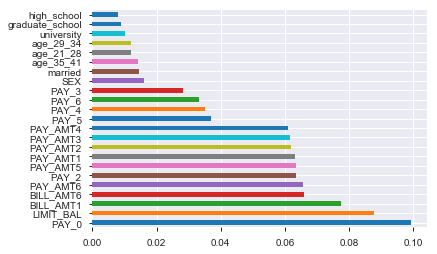

In [179]:
model_feature_selection = ExtraTreesClassifier()
model_feature_selection.fit(X,Y)
print(model_feature_selection.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_feature_selection.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()


In [256]:
Y, encoder = preprocess_labels(Y)
X = X.values

#TEST

df_test = df_test.values

In [257]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.30, 
                                                  shuffle = True)

In [258]:
dims = X_train.shape[1]
nb_classes = 2

model = Sequential()
model.add(Dense(16, input_shape=(dims,), activation = "relu"))
#model.add(Dense(32, activation = "relu"))
#model.add(Dense(32, activation = "relu"))
model.add(Dense(nb_classes, activation = 'sigmoid'))

model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 16)                384       
_________________________________________________________________
dense_197 (Dense)            (None, 2)                 34        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [259]:
#adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
class_weight = {0: 1, 1: 2.75}

model.compile(loss='binary_crossentropy', optimizer='RMSprop', 
              metrics=[keras_metrics.precision(label=1), keras_metrics.recall(label=1)])

network_history = model.fit(X_train, Y_train, batch_size=64, 
                            epochs=75, verbose=1, validation_data=(X_val, Y_val), 
                            class_weight=class_weight)


tracking <tf.Variable 'Variable_144:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_145:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_146:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_147:0' shape=() dtype=int32> fn
Train on 18900 samples, validate on 8100 samples
Epoch 1/75
18900/18900 [==============================] - 5s 256us/step - loss: 0.9405 - precision: 0.2185 - recall: 0.1805 - val_loss: 0.6178 - val_precision: 0.4828 - val_recall: 0.2175
Epoch 2/75
18900/18900 [==============================] - 3s 174us/step - loss: 0.8988 - precision: 0.4729 - recall: 0.2677 - val_loss: 0.5695 - val_precision: 0.5141 - val_recall: 0.4029
Epoch 3/75
18900/18900 [==============================] - 3s 169us/step - loss: 0.8729 - precision: 0.4627 - recall: 0.4393 - val_loss: 0.5775 - val_precision: 0.4509 - val_recall: 0.5248
Epoch 4/75
18900/18900 [==============================] - 2s 95us/step - loss: 0.8608 - precision: 0.4528 - recall: 0.4793 - val_lo

Epoch 43/75
18900/18900 [==============================] - 3s 180us/step - loss: 0.8105 - precision: 0.5459 - recall: 0.4684 - val_loss: 0.5218 - val_precision: 0.5823 - val_recall: 0.4712
Epoch 44/75
18900/18900 [==============================] - 3s 180us/step - loss: 0.8099 - precision: 0.5554 - recall: 0.4872 - val_loss: 0.5479 - val_precision: 0.5554 - val_recall: 0.5007
Epoch 45/75
18900/18900 [==============================] - 2s 104us/step - loss: 0.8098 - precision: 0.5581 - recall: 0.4995 - val_loss: 0.5455 - val_precision: 0.5633 - val_recall: 0.5052
Epoch 46/75
18900/18900 [==============================] - 3s 155us/step - loss: 0.8096 - precision: 0.5460 - recall: 0.4892 - val_loss: 0.5284 - val_precision: 0.5767 - val_recall: 0.4814
Epoch 47/75
18900/18900 [==============================] - 3s 180us/step - loss: 0.8094 - precision: 0.5592 - recall: 0.4868 - val_loss: 0.5309 - val_precision: 0.5712 - val_recall: 0.4933
Epoch 48/75
18900/18900 [==============================

In [260]:
#metrics on validation set
y_pred_val = model.predict_classes(X_val)
y_true_val = []
for i in range(len(Y_val)):
    y_true_val.append(np.argmax(Y_val[i]))
y_true_val=np.array(y_true_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_true_val, y_pred_val, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.89      0.88      6324
     class 1       0.57      0.52      0.55      1776

   micro avg       0.81      0.81      0.81      8100
   macro avg       0.72      0.71      0.71      8100
weighted avg       0.80      0.81      0.81      8100



In [261]:
#metrics on training set

y_pred_train = model.predict_classes(X_train)
y_true_train = []
for i in range(len(Y_train)):
    y_true_train.append(np.argmax(Y_train[i]))
y_true_train=np.array(y_true_train)

target_names = ['class 0', 'class 1']
print(classification_report(y_true_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87     14703
     class 1       0.54      0.51      0.52      4197

   micro avg       0.79      0.79      0.79     18900
   macro avg       0.70      0.69      0.70     18900
weighted avg       0.79      0.79      0.79     18900



In [262]:
def f1_measure(p,r):
    return (2*p*r)/(p+r)

In [263]:
p_val = pd.DataFrame(network_history.history['val_precision'])
r_val = pd.DataFrame(network_history.history['val_recall'])

p_train = pd.DataFrame(network_history.history['precision'])
r_train = pd.DataFrame(network_history.history['recall'])

f1_val = f1_measure(p_val,r_val)
f1_train = f1_measure(p_train,r_train)

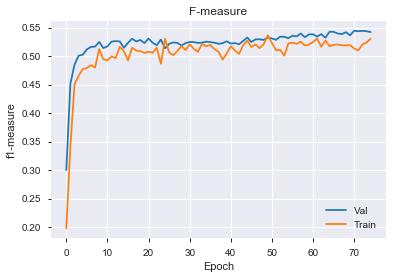

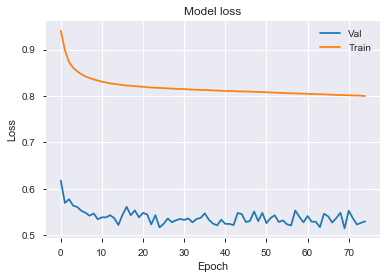

In [264]:
plt.plot(f1_val)
plt.plot(f1_train)
plt.title('F-measure')
plt.ylabel('f1-measure')
plt.xlabel('Epoch')
plt.legend(['Val', 'Train'], loc='lower right')
plt.show()

plt.plot(network_history.history['val_loss']) 
plt.plot(network_history.history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Val', 'Train'], loc='upper right') 
plt.show()

In [273]:
#ANN on test.csv

Y_test = model.predict_classes(df_test)

Y_df_test = pd.DataFrame(Y_test, columns=['TARGET'])

In [280]:
t = Y_df_test.TARGET.value_counts()
targ_1_perc = t[1]*100/(t[0]+t[1])

print("Classe 1: ", targ_1_perc, "% \n", "Classe 0: ", (100-targ_1_perc) , "% \n")

Classe 1:  18.6 % 
 Classe 0:  81.4 % 



In [289]:
out_file = open("Federico_Signoretta_847343_score1.txt","w")
for i in Y_test:
    out_file.write(str(i)+'\n')
out_file.close()